# 基于物料使用量和商品在保量的相关性分析，预测物料使用量的模型

## Phase 1 Proposal

### 项目背景
有商品在保修期内的数量和物料消耗的数据，通过找出物料消耗和在保修期内数据的关系做需求预测，实现节约仓储和国际物流运输成本的目的。

### 基本思想
先画个图看看correlation of x and y，感觉有搞头就回归试试，试了效果差就换模型

## Phase 2  Data_Cleaning

### 导入数据

In [13]:
import scipy.stats as st
import pandas as pd

In [14]:
usage = pd.read_excel(r'/Users/dongwenlu/Desktop/文璐/找工/Lenovo/USAGE.xlsx') 
install_base = pd.read_excel(r'/Users/dongwenlu/Desktop/文璐/找工/Lenovo/INSTALL_BASE.xlsx')

### 缺失值处理
#### 缺失值类型
1. Missing Completely at Random（MCAR）

2. Missing at Random（MAR）

3. Missing NOT at Random（MNAR）

#### 缺失值查看
1. isnull( )
2. notnull( )

#### 缺失值移除
1. dropna( )
    缺失值占比在40%以上即可drop
    - drop(axis=1)
    
#### 缺失值填充
1. univariate 单变量
- fillna
    - df2.fillna(value='填充') 
    - df2.fillna(method = 'ffill') 
    - df2.fillna(method = 'bfill') 
- replace
    - df2.replace(np.nan, -1)
- SimpleImputer

In [ ]:
 from sklearn.impute import SimpleImputer
         imp_mean = SimpleImputer( strategy='mean') 
         imp_mean.fit(df)
         imputed_df = imp_mean.transform(df) 

2. multivariate 多变量
- Impyute

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import numpy as np
random.seed(0)

#Fetching the dataset
import pandas as pd
dataset = fetch_california_housing()
train, target = pd.DataFrame(dataset.data), pd.DataFrame(dataset.target)
train.columns = ['0','1','2','3','4','5','6','7']
train.insert(loc=len(train.columns), column='target', value=target)

#Randomly replace 40% of the first column with NaN values
column = train['0']
print(column.size)
missing_pct = int(column.size * 0.4)
i = [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i] = np.NaN

import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training_impyute=fast_knn(train.values, k=30)
imputed_training_impyute

from impyute.imputation.cs import mice
imputed_training_MICE=mice(train.values)
imputed_training_MICE

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=30)
imputer.fit(train)
# transform the dataset
imputed_training_KNNImputer = imputer.transform(train)
imputed_training_KNNImputer

## Phase 3 Data_Analysis

### 回归分析 

先取一个特定的pn 第一个表按年月取出数据 匹配第二个表的数据 然后画heatmap看看他们的相关性

['PN', 'TOPMOST', 'MT', 'FSL_NO', 'CITY', 'LOCATION_NAME', 'STORAGE_LOCATION', 'ABBR', 'REGION', 'GEO', 'StartDate', 'EndDate', 'WarrantyCategory', 'FIRST_IB', 'SLA', 'LocationPriority', 201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 20190

<AxesSubplot:xlabel='sumqty'>

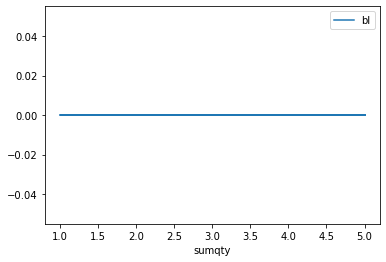

In [19]:
import pandas as pd
input=usage
selected_input=input[input['PN']=='00AD006'][['Corddate','Qty']]
selected_input['Corddate']=selected_input['Corddate'].astype(str)
selected_input['month']=selected_input.Corddate.apply(lambda x:x.split('-')[0]+x.split('-')[1])
#selected_input['month']=selected_input.Corddate.apply(lambda x:x.split('/')[0]+'0'*(2-len(x.split('/')[1]))+x.split('/')[1])
selected_input['month_new']=selected_input['month']
selected_input.set_index("month",inplace=True)
selected_input['sumqty']=selected_input['Qty'].groupby(by='month').sum()
selected_input.sort_values(by='month')
inp2=install_base
ans=[]
for column in inp2:
    ans.append(column)
print(ans)
inp2=inp2[inp2['PN']=='00AD006']
selected_input['bl']=0
for i in selected_input['month_new']:
    i=str(i)
    if (i not in ans):
        continue
    selected_input.loc[selected_input['month_new']==i,'bl']=sum(inp2[inp2['PN']=='00AD006'][i].values)
selected_input.plot(x='sumqty',y='bl')

In [20]:
selected_input

,Corddate,Qty,month_new,sumqty,bl
month,,,,,
201909,2019-09-03,1,201909,5,0
201909,2019-09-03,1,201909,5,0
201909,2019-09-03,1,201909,5,0
201909,2019-09-03,1,201909,5,0
201908,2019-08-19,1,201908,2,0
201908,2019-08-19,1,201908,2,0
201906,2019-06-03,1,201906,1,0
202004,2020-04-06,1,202004,1,0
201903,2019-03-19,1,201903,1,0


### 线性回归预测

In [ ]:
y = datas.iloc[:, 1] # 因变量为第 2 列数据
x = datas.iloc[:, 2:6] # 自变量为第 3 列到第 6 列数据

# 将 y 分别增加一个轴，以满足 sklearn 中回归模型认可的数据
# 此时由于 x 是多元变量，则不用添加新的轴了
y = y[:, np.newaxis]

model = LinearRegression() # 构建线性模型
model.fit(x, y) # 自变量在前，因变量在后
predicts = model.predict(x) # 预测值
R2 = model.score(x, y) # 拟合程度 R2
print('R2 = %.3f' % R2) # 输出 R2
coef = model.coef_ # 斜率
intercept = model.intercept_ # 截距
print(model.coef_, model.intercept_) # 输出斜率和截距

### 递归预测

### 校验预测

加入extra term